### Step 7 – Decision Tree

1. Train a Decision Tree classifier for the two classes.
2. Visualize the tree and the **decision boundary**.
3. Evaluate performance metrics: accuracy, precision, recall, and F1-score.
***

### ⚙️ When to Use Decision Tree

- ✅ Use it when:
  - You need a **model that is easy to interpret** and visualize.  
  - The relationships between variables are **non-linear**.  
  - You want a **fast baseline** or an estimator to use inside an ensemble (Random Forest, Gradient Boosting).  

- 🚫 Avoid it when:
  - The model shows **overfitting** on training data — use pruning or limit depth.  
  - You need **smooth or continuous** decision boundaries.  
  - Data is **highly noisy** or unstable across samples.
***

### 🤖 **Model Hyperparameters**

- `max_depth = None` — expands until all leaves are pure  
- `criterion = "gini"` — impurity measure for node splits  
- `random_state = 42` — controls randomness of splits 
***

In [1]:
%run 00-setup.py

In [2]:
from tasks.tree import run_tree
from ml.data import load_dataset
from sklearn.model_selection import train_test_split

from ml.viz import plt_dboundary, plt_cmatrix, plt_dtree, export_tree_text

In [3]:
X, y, _ = load_dataset("../data/data_bivariate_gaussian.npz")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
res = run_tree(X_train, y_train, X_test, y_test,

               params={"max_depth": None, 
                       "criterion": "gini",
                       "seed": 42}
               )

In [5]:
res["test"]["metrics"]

{'accuracy': 0.95,
 'precision': 0.9655172413793104,
 'recall': 0.9333333333333333,
 'f1': 0.9491525423728814}

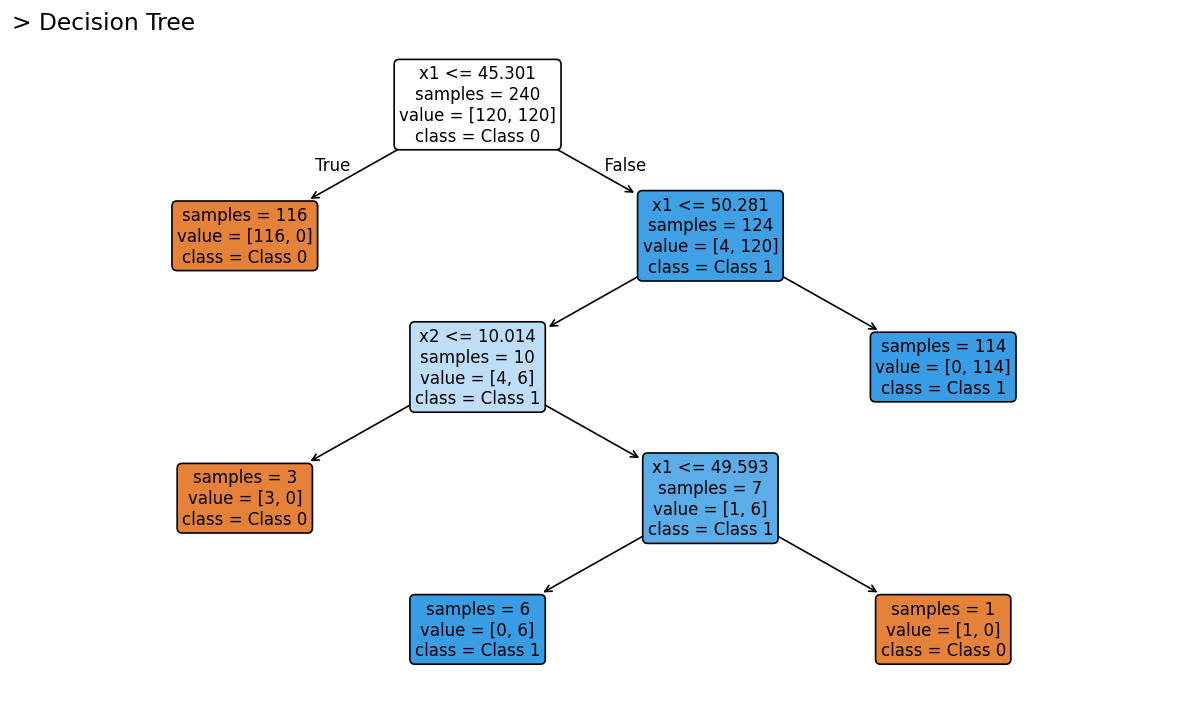

(<Figure size 1200x720 with 1 Axes>, <Axes: title={'left': '> Decision Tree'}>)

In [6]:
plt_dtree(
    res["model"],
    feature_names=("x1", "x2"),
    class_names=("Class 0", "Class 1"),
    max_depth=None,
)

In [7]:
print(export_tree_text(res["model"], feature_names=("x1", "x2")))

|--- x1 <= 45.30
|   |--- class: 0
|--- x1 >  45.30
|   |--- x1 <= 50.28
|   |   |--- x2 <= 10.01
|   |   |   |--- class: 0
|   |   |--- x2 >  10.01
|   |   |   |--- x1 <= 49.59
|   |   |   |   |--- class: 1
|   |   |   |--- x1 >  49.59
|   |   |   |   |--- class: 0
|   |--- x1 >  50.28
|   |   |--- class: 1



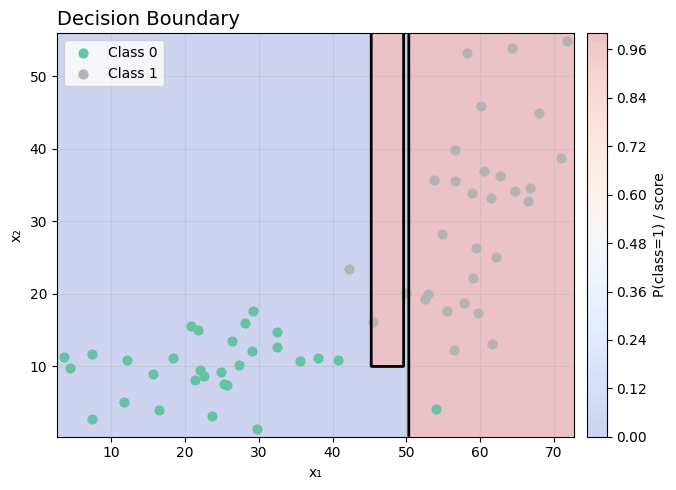

(<Figure size 700x500 with 2 Axes>,
 <Axes: title={'left': 'Decision Boundary'}, xlabel='x₁', ylabel='x₂'>)

In [8]:
plt_dboundary(res["model"], X_test, y_test)

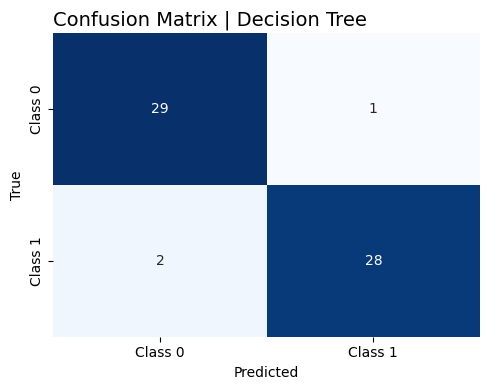

(<Figure size 500x400 with 1 Axes>,
 <Axes: title={'left': 'Confusion Matrix | Decision Tree'}, xlabel='Predicted', ylabel='True'>)

In [9]:
plt_cmatrix(
    y_true=y_test,
    y_pred=res["test"]["y_pred"],
    title="Confusion Matrix | Decision Tree"
)